<h2 align='center'>Multiclass Logistic Regression Example</h2>

### Get toy dataset for Iris example from https://scikit-learn.org/stable/datasets/toy_dataset.html

In [2]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [10]:
df = iris.frame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [109]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Initial visualization of the data

In [12]:
# Add meaningful names in the dataframe to display instead of the classes 0, 1 or 2
df["target_name"] = df["target"].map({0:'setosa', 1: 'versicolor', 2: 'virginica'})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

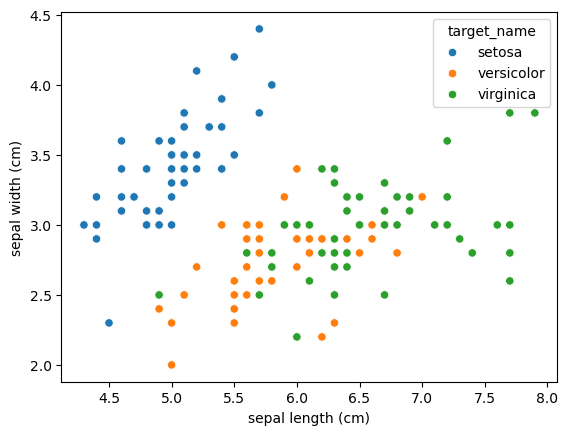

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(df, x="sepal length (cm)", y="sepal width (cm)", hue="target_name")

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

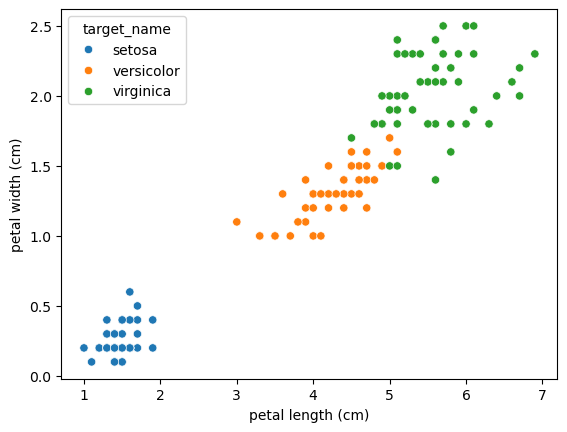

In [16]:
sns.scatterplot(df, x="petal length (cm)", y="petal width (cm)", hue="target_name")

In [18]:
X = df[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]]
y = df["target"]
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [24]:
y_pred = model.predict(X_test)
y_pred

array([0, 2, 0, 1, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 1, 2, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 2, 2, 1, 0, 0, 0, 1, 2, 0, 2, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0])

In [26]:
y_pred[:10].tolist()

[0, 2, 0, 1, 2, 2, 2, 0, 2, 0]

In [28]:
y_test[:10].tolist()  # compare y_test with y_predict

[0, 2, 0, 1, 2, 2, 2, 0, 2, 0]

### Model Evaluation: Precision, Recall, F1-Score

In [30]:
model.score(X_test, y_test)

0.9777777777777777

In [32]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
score

0.9777777777777777

In [34]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.93      0.96        14
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



### Model Evaluation: Confusion Matrix

In [36]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.93      0.96        14
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



In [38]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

<Axes: >

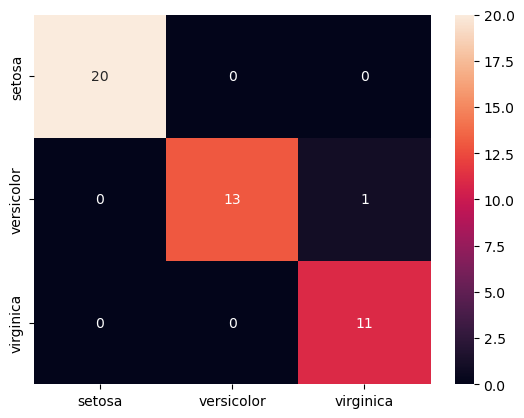

In [40]:
sns.heatmap(cm, xticklabels=iris.target_names, yticklabels=iris.target_names, annot=True)

In [42]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')